In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def load_data(root='CroppedYaleB', reduce=4):
    """ 
    Load ORL (or Extended YaleB) dataset to numpy array.
    
    Args:
        root: path to dataset.
        reduce: scale factor for zooming out images.
        
    """ 
    images, labels = [], []

    for i, person in enumerate(sorted(os.listdir(root))):
        
        if not os.path.isdir(os.path.join(root, person)):
            continue
        
        for fname in os.listdir(os.path.join(root, person)):    
            
            # Remove background images in Extended YaleB dataset.
            if fname.endswith('Ambient.pgm'):
                continue
            
            if not fname.endswith('.pgm'):
                continue
                
            # load image.
            img = Image.open(os.path.join(root, person, fname))
            img = img.convert('L') # grey image.

            # reduce computation complexity.
            img = img.resize([s//reduce for s in img.size])

            # TODO: preprocessing.

            # convert image to numpy array.
            img = np.asarray(img).reshape((-1,1))

            # collect data and label.
            images.append(img)
            labels.append(i)

    # concate all images and labels.
    images = np.concatenate(images, axis=1)
    labels = np.array(labels)

    return images, labels

In [9]:
X, Y = load_data(root='ORL', reduce=2)
print('ORL dataset: X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))

ORL dataset: X.shape = (2576, 400), Y.shape = (400,)


In [94]:
# Reconstruction of Reflectance Spectra Using RobustNonnegative Matrix Factorization
# A. Ben Hamza  and  David J. Brady
# An implementation of Hypersurface Cost Function NMF
# Available at https://users.encs.concordia.ca/~hamza/HamzaBrady.pdf

def calculate_updates(X, W, H):
    Wupdate = -(X@H.T + W@H@H.T) / np.sqrt(1 + np.sum( (X - W@H)**2  ))
    Hupdate = -(W.T@X + W.T@W@H) / np.sqrt(1 + np.sum( (X - W@H)**2  ))
    return Wupdate,Hupdate

In [111]:
def factorize(X, niters=1000, alpha=0.001, beta=0.001):
    W = np.random.rand(2576,10) * 255
    H = np.random.rand(10,400) * 255
    loss = []
    for iter in range(niters):
        wupdate, hupdate = calculate_updates(X,W,H)
        W += alpha * wupdate
        H += beta * hupdate
        loss.append(np.sum((X - W@H)**2))
    return W, H, loss

In [112]:
%%time

W1, H1, loss = factorize(X, niters=1000)

CPU times: user 27.8 s, sys: 1.73 s, total: 29.5 s
Wall time: 15.5 s


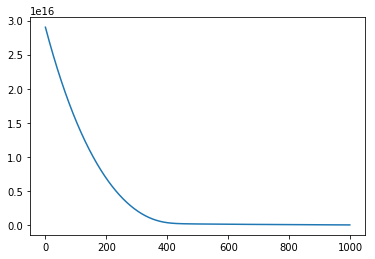

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss)